In [11]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from scipy.special import expit  # 시그모이드 함수

matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

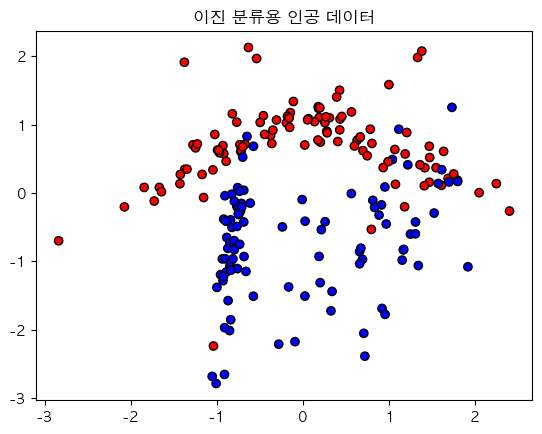

In [13]:
# 이진 분류용 2D 인공 데이터 생성
X, y = make_classification(n_samples=200, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=1)

# 정규화
sc = StandardScaler()
X = sc.fit_transform(X)

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("이진 분류용 인공 데이터")
plt.show()

## Gradient Descent

In [31]:
def logistic_gradient_descent(X, y, lr=0.1, max_iter=1000):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.zeros(n + 1)
    losses = []

    for _ in range(max_iter):
        z = X_b @ theta
        h = expit(z)
        loss = -np.mean(y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8))
        losses.append(loss)

        grad = X_b.T @ (h - y) / m  # 비용 함수의 gradient 계산
        theta -= lr * grad   # 가중치 업데이트

    return theta, losses

## Newton’s Method

In [33]:
def logistic_newton_method(X, y, max_iter=10):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.zeros(n + 1)
    losses = []

    for _ in range(max_iter):
        z = X_b @ theta
        h = expit(z)
        loss = -np.mean(y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8))
        losses.append(loss)

        R = np.diag(h * (1 - h))  # 시그모이드의 도함수를 대각 행렬로 구성
        H = (X_b.T @ R @ X_b) / m  # 2차 미분 Hessian 행렬
        grad = X_b.T @ (h - y) / m  # gradient
        theta -= np.linalg.inv(H) @ grad  # 뉴턴-랩슨 업데이트: θ ← θ - H⁻¹ ∇

    return theta, losses

In [23]:
# 손실 함수 변화 시각화

def plot_loss_curves(loss_gd, loss_nt):
    plt.figure(figsize=(8, 5))
    plt.plot(loss_gd, label='Gradient Descent', color='red')
    plt.plot(loss_nt, label="Newton's Method", color='blue')
    plt.xlabel('Iteration')
    plt.ylabel('Loss (Log Loss)')
    plt.title('손실 함수 수렴 속도 비교')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
def plot_decision_boundary(X, y, theta, title):
    cmap = ListedColormap(['#FFAAAA', '#AAAAFF'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    X_grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    Z = expit(X_grid @ theta).reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=60)
    plt.title(title)
    plt.grid(True)
    plt.show()

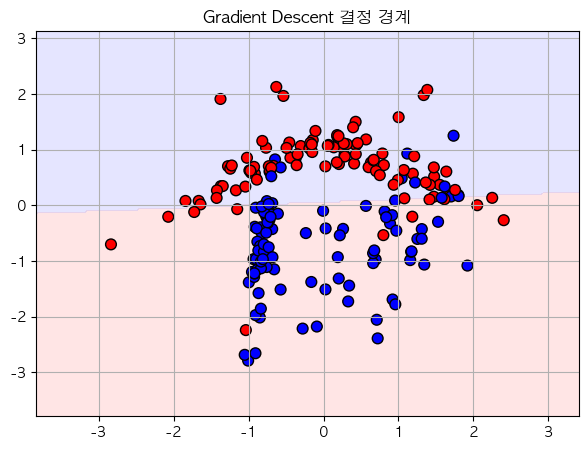

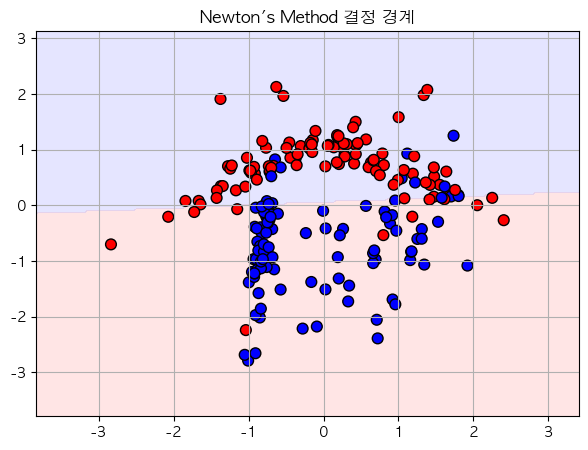

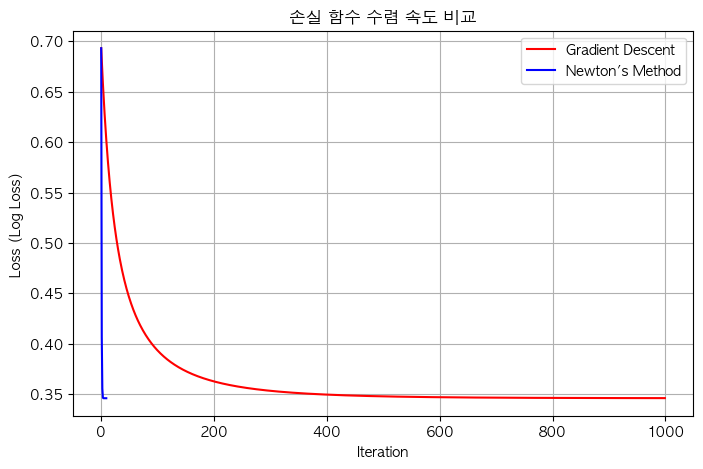

In [29]:
# 학습 및 손실 수집
theta_gd, loss_gd = logistic_gradient_descent(X, y, lr=0.1, max_iter=1000)
theta_nt, loss_nt = logistic_newton_method(X, y, max_iter=10)

# 결정 경계 시각화
plot_decision_boundary(X, y, theta_gd, "Gradient Descent 결정 경계")
plot_decision_boundary(X, y, theta_nt, "Newton's Method 결정 경계")

# 손실 함수 비교
plot_loss_curves(loss_gd, loss_nt)